In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import math
from matplotlib import pyplot as plt
from scipy import stats
warnings.filterwarnings('ignore')

# Introduction To The Data

In this project, I'll be exploring the wine quality dataset from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wine+Quality). This dataset contains several wine observations related to red and white winho verde wine samples, from the north of portugal. Note: Due to privacy and logistic issues, only physicochemical and sensory variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

For more information about this dataset, feel free to checkout `winequality.names`, also located in this repository.

# Definitions

Throughout this notebook, you'll discover 10 chemical properties that will be useful when reading through this analysis. In addition to defining them, I will also give a brief description how they relate to wine.

- Fixed acidity: The total concentration of titratable acids and free hydrogen ions present in your wine. Fixed acidity is a component of total acidity, which affects how a wine is perceived to taste.
- Volatile acidity: Volatile acids are produced through microbial action such as yeast fermentation, malolactic fermentation, and other fermentations carried out by spoilage organisms. The most prominent volatile acid present in wine is acetic acid. Also of importance is lactic acid. Volatile Acidity, in small doses, can give a wine a nice bouquet. But too little can make a wine taste flat while too much can make a wine taste sour, characterized by notes of glue and vinegar.
- Citric acid: Citric acid exists in grapes of every variety and in greater quantity in must concentrated by noble rot or the raisining of the grapes. While citric acid can add ‘freshness’ and flavor to wines, it is found in small quantities due to the aggressive citric flavors it can add to the wine.
- Residual sugar: Residual Sugar (or RS) is from natural grape sugars leftover in a wine after the alcoholic fermentation finishes. It’s measured in grams per liter. RS contributes to the balance of the wine.
- Chlorides: The amount of salt in the wine. Salt balences out the residual sugars of the wine.
- Free sulfur dioxide: the free form of $SO_2$ exists in equilibrium between molecular $SO_2$ (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine.
- Total sulfur dioxide: amount of free and bound forms of $S0_2$; in low concentrations, $SO_2$ is mostly undetectable in wine, but at free $SO_2$ concentrations over 50 ppm, $SO_2$ becomes evident in the nose and taste of wine.
- Density: the density of water is close to that of water depending on the percent alcohol and sugar content.
- pH: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale
- Sulphates: a wine additive which can contribute to sulfur dioxide gas ($S0_2$) levels, wich acts as an antimicrobial and antioxidant
- Alcohol: The ABV (alcohol by volume) of a wine.
- Quality: How a wine was rated

# Reading in the Data

In [2]:
red = pd.read_csv('winequality-red.csv', sep=';')

In [3]:
white = pd.read_csv('winequality-white.csv', sep=';')

In [4]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# Descriptive Statistics

To start off, let's use the `.describe()` method to generate some descriptive statistics about our wine dataframes. 

Because `.describe()` excludes NA values, we'll have to use `df.info()` to see how many non-null values there are in each column.

Statistics for each column within the dataframe include:
- Count of how many objects are present.
- The mean or average.
- The standard deviation or the spread.
- The minimum value.
- The 25th precentile.
- The 50th precentile or the median.
- The 75th precentile.
- The maximum value

In [6]:
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [9]:
white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


Awesome! So there aren't any null values in any of the wine dataframes.

Let's begin by generating a correlation matrix to see which columns are correlated with one another. To do this, we can use the `corr()` method.

In [10]:
red.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [11]:
white.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


Comparing the properties of the red and white wines not in a single figure isn't ideal. Let's do a couple things:
1. Use `seaborn.heatmap` to visualize the correlation matrix as a heatmap.
1. Use the `numpy.triu_by_indicies` method to generate a mask for the upper triangle of the correlation matrix. We can do this because a correlation matrix is symetric about the diagonal. In other words, the upper triangle is a relection of the lower triangle.
1. Visualize both heatmaps on a single matplotlib figure for easier comparison.

In [12]:
mask = np.zeros_like(red.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

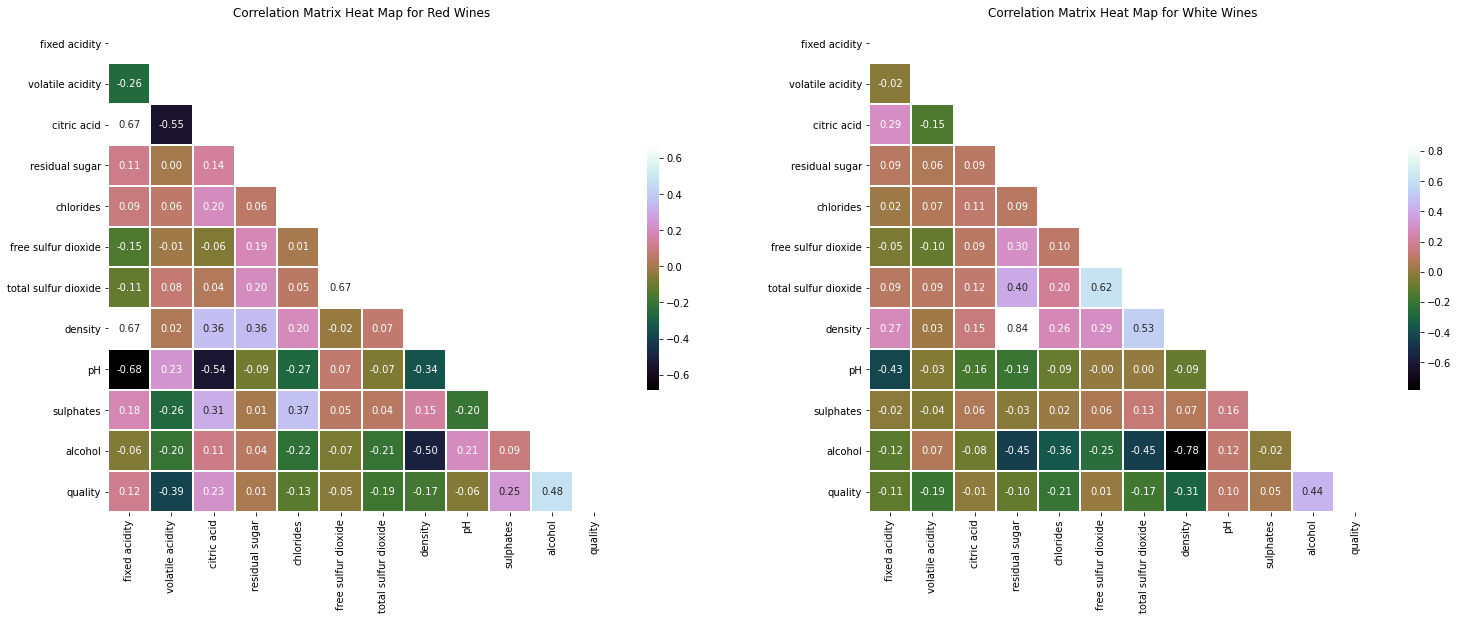

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25,9))
sns.heatmap(red.corr(), mask=mask, annot=True, fmt='.2f', cmap='cubehelix', cbar_kws={'shrink' : 0.5}, linewidths=1, ax=ax1)
ax1.set_title("Correlation Matrix Heat Map for Red Wines");
sns.heatmap(white.corr(), mask=mask, annot=True, fmt='.2f', cmap='cubehelix', cbar_kws={'shrink' : 0.5}, linewidths=1, ax=ax2)
ax2.set_title("Correlation Matrix Heat Map for White Wines");

A few observations:
- Alcohol is positively correlated with quality
- Density is negatively correlated with alcohol
- Ih white wine, residual sugar is negatively correlated with alcohol

# Distribution of Variables

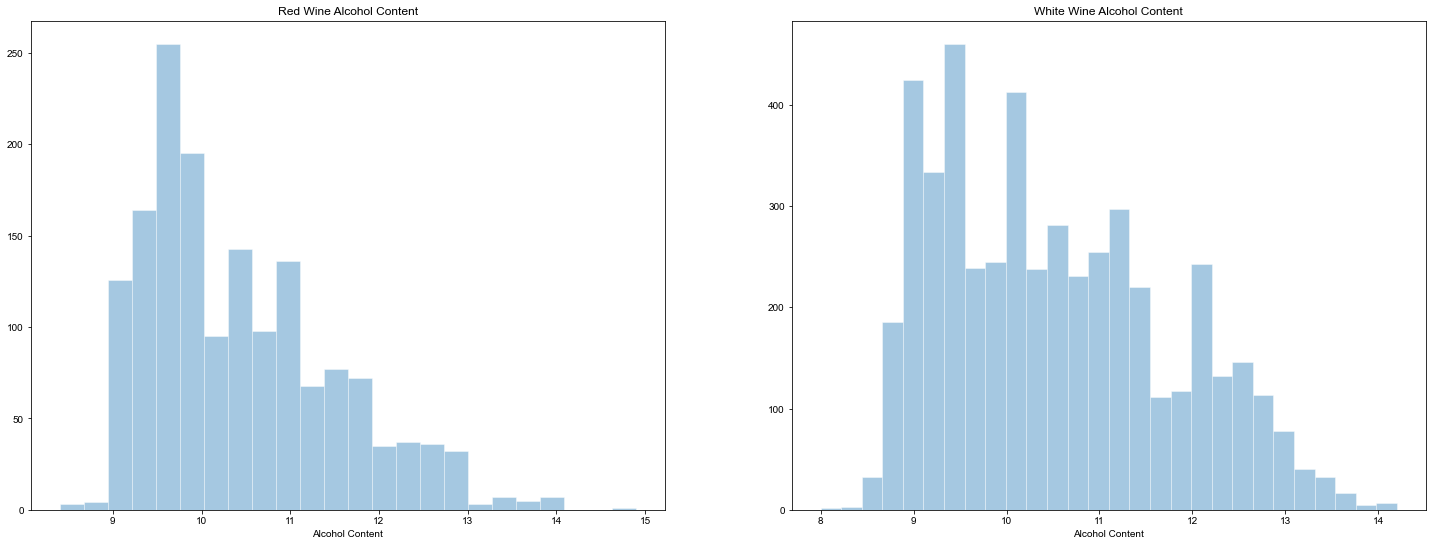

In [14]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(25,9))
sns.set_style(style='white')
sns.distplot(a=red['alcohol'], ax=ax1, kde=False)
ax1.set_xlabel('Alcohol Content')
ax1.set_title('Red Wine Alcohol Content')
sns.distplot(a=white['alcohol'], ax=ax2, kde=False)
ax2.set_xlabel('Alcohol Content')
ax2.set_title('White Wine Alcohol Content')
plt.show()

Alcohol level distribution looks skewed. The sample of white wines is smaller but it gives the same pattern of alcohol level distribution as while wines. Seems that most wines have 9.5%, mean is 10.49% of alcohol. However, it's important to note that white wine is on average of 10% ABV; however, it can range from as little as 5% to as much as 14.3%. Red wine has more alcohol, ranging from 12% to 15%.

In [15]:
cols = ['r_wine_quality', 'w_wine_quality']
wine_quality = pd.concat([red['quality'], white['quality']], axis=1)
wine_quality.columns = cols

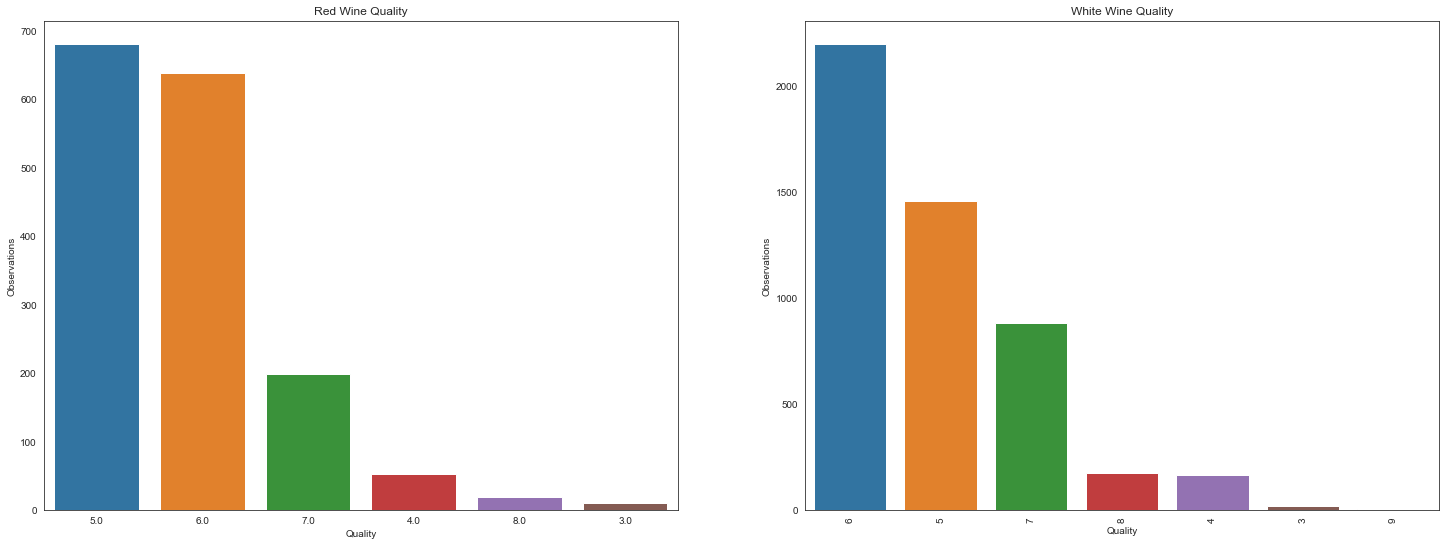

In [16]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(25,9))
sns.countplot(x='r_wine_quality', data=wine_quality, order=wine_quality['r_wine_quality'].value_counts().index, ax=ax1)
ax1.set_xlabel('Quality')
ax1.set_ylabel('Observations')
ax1.set_title('Red Wine Quality')
sns.countplot(x='w_wine_quality', data=wine_quality, order=wine_quality['w_wine_quality'].value_counts().index, ax=ax2)
ax2.set_xlabel('Quality')
ax2.set_ylabel('Observations')
ax2.set_title('White Wine Quality')
plt.xticks(rotation=90)
plt.show()

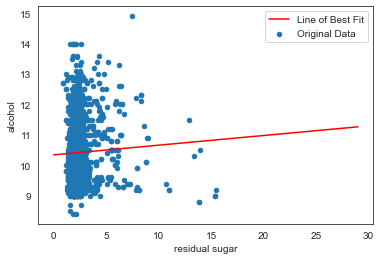

In [17]:
slope, intercept, rvalue, pvalue, stderr = stats.linregress(x=red['residual sugar'], y=red['alcohol'])

## Plot Line of Best Fit
bestx = list(range(0,30))
besty = [intercept + slope * x for x in bestx]

red.plot.scatter(x = 'residual sugar', y = 'alcohol', label='Original Data')
plt.plot(bestx, besty, 'r', label='Line of Best Fit')
plt.legend()

From the above graph, there doesn't look like a clear relationship between residual sugars and alcohol content in red wines, but it does seem to look like a slight positive relationship. In other words, the more tesidual sugars in a wine, the higher the alcohol content is in a red wine. Let's see if this holds true for the white wine.

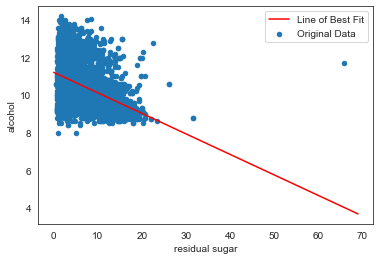

In [18]:
slope, intercept, rvalue, pvalue, stderr = stats.linregress(x=white['residual sugar'], y=white['alcohol'])

## Plot Line of Best Fit
bestx = list(range(0,70))
besty = [intercept + slope * x for x in bestx]

white.plot.scatter(x = 'residual sugar', y = 'alcohol', label='Original Data')
plt.plot(bestx, besty, 'r', label='Line of Best Fit')
plt.legend()

Hmm ... looks like there's an outlier that is way off base from our line of best fit. If we disregard that outlier, higher residual sugar content often means low alcohol content at least in white wine.

# Inferential Statistics

Up in the section where we looked at the means of our two dataframes, we noted the quality means were similar. But does that truly mean they are not statistically different? Maybe but maybe not. Especially when it comes to statistics, there are no healthy assumptions.

Let's set up a two sample t-test to test our hypothesis. A t-test is used to determine whether there is a significant difference between the means of two groups.

Let's create a dataframe to make testing a little bit easier. We'll we `pd.concat()` with `axis=1` to concatenate our two quality columns so they're side-by-side.

In [19]:
wine_quality.count()

r_wine_quality    1599
w_wine_quality    4898
dtype: int64

Since we have unequal sample sizes, we must use a variant of the $t$ statistic forumla given as the following
\begin{equation}
t = \frac{\bar{X_1} - \bar{X_2}}{s_p\sqrt{\frac{1}{n_1}+\frac{1}{n_2}}}
\end{equation}
where $\bar{X_1}, \bar{X_1} $ are the means of a sample, $n_1, n_2$ are the sample sizes, and $s_p$ is an estimator of the pooled standard deviation of the two samples.

The pooled standard deviation can be calulated with the following
\begin{equation}
s_p = \sqrt\frac{(n_1-1)s_{x_1}^2 + (n_2-1)s_{x_2}^2}{n_1+n_2-2}
\end{equation}


When storing our sample sizes to variables, we must use `.count()` as it will count the number of non-null values in the Series whereas `len()` will count the number of all the objects in the Series

In [20]:
red_qual_mean = wine_quality['r_wine_quality'].mean()
red_qual_std = wine_quality['r_wine_quality'].std()
white_qual_mean = wine_quality['w_wine_quality'].mean()
red_qual = wine_quality['r_wine_quality'].count()
white_qual_std = wine_quality['w_wine_quality'].std()
white_qual = wine_quality['w_wine_quality'].count()
sp_num = (red_qual-1)*(red_qual_std**2) + (white_qual-1)*(white_qual_std**2)
sp_dom = red_qual + white_qual - 2
sp = math.sqrt(sp_num/sp_dom)

In [21]:
t_stat = (red_qual_mean - white_qual_mean)/(sp*(math.sqrt((1/red_qual) + (1/white_qual))))

In [22]:
t_stat

-9.685649554187581

In [23]:
df = red_qual + white_qual - 2

In [24]:
df

6495

Instead of looking up the forumula for the t-test, we can use `scipy.stats.ttest_ind_from_stats` since we have unequal sample sizes. All we'd have to do is calculate the mean, standard deviation, and number of observations to get the t_statistic. The only thing we have to manually do is interpret the results.

In [25]:
statistic_qual, pvalue_qual = stats.ttest_ind_from_stats(mean1=red_qual_mean, std1=red_qual_std, nobs1=red_qual, mean2=white_qual_mean, std2=white_qual_std, nobs2=white_qual)

In [26]:
print(f't-statistic for quality: {statistic_qual}, p-value for quality: {pvalue_qual}')

t-statistic for quality: -9.685649554187581, p-value for quality: 4.888069044207019e-22


Consulting a t-table, we see that our t critical value is 1.96 at a confidence level of 95% since we have 6495 degrees of freedom. . 

Because our t-statistic of -9.68 is less than 1.96, we can reject our null hypothesis and conclude we have sufficient evidence to be believe that the quality of the white and red wines are, in fact, different.

So we see that the quality of the wines are different but what's driving the difference? Are white wines chemically different then red wines? Does white wine "hit" differently then red wine? If so, why? Is it the residual sugar content? Is it the pH level of the wines? Or is it some combination of physicochemical properties? 

Coming up with a regression model to predict wine's quality is out of the scope of this project so we'll just investigate resudual sugar and pH for now

In [27]:
statistic_ph, pvalue_ph = stats.ttest_ind_from_stats(mean1 = red['pH'].mean(), std1 = red['pH'].std(), nobs1 = red.shape[0], mean2 = white['pH'].mean(), std2 = white['pH'].std(), nobs2 = white.shape[0])

In [28]:
print(f't-statistic for pH level: {statistic_ph}, p-value for pH level: {pvalue_ph}')

t-statistic for pH level: 28.09002558145368, p-value for pH level: 5.923307967110629e-164


Consulting a t-table, we see that our t critical value is 1.96 at a confidence level of 95% since we have 6495 degrees of freedom. . 

Because our t-statistic of 28.09 is more than 1.96, we can reject our null hypothesis and conclude we have sufficient evidence to be believe that the pH of the white and red wines are, in fact, different.

# Recommendations
- If you're looking for a wine that is sweet but also has low ABV levels, go for a white wine.
- Add salt to wine to balence out the sugars if you find the wine to sugary.

# Conclusion

Throughout this analysis, we found out that

- Red and white wines are fundamentally different in both quality and their pH levels
- Most wines have an ABV of 9-10%
- In white wine, more residual sugar often indicates a low ABV
- Alcohol is a good indicator of the quality of the wine

# Possible Next Steps
- Investigate the relationship of other variables.
- Build a regression model to predict a wine's quality.
- Build a classification model to predict the color of the wine.

# Interesting Findings
- Adding more salt to wine can balance out sugar levels and bring out more of flavors of the wine.
- Wines often have low levels of citric acid due to the agressiveness of the flavors it can add to the wine.